# ➡️Exploratory Data Analysis 1


# Loading Required Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading CSV File

In [3]:
df = pd.read_csv('supply.csv')
df

,date,supply_type,used_units,inventory_level
0,2025-01-01,Supply_1,35.269563,964.730437
1,2025-01-01,Supply_2,25.677061,974.322939
2,2025-01-01,Supply_3,55.136125,944.863875
3,2025-01-01,Supply_4,35.454317,964.545683
4,2025-01-01,Supply_5,43.397502,956.602498
...,...,...,...,...
1195,2025-04-30,Supply_6,23.742305,976.257695
1196,2025-04-30,Supply_7,64.955673,935.044327
1197,2025-04-30,Supply_8,21.987680,978.012320
1198,2025-04-30,Supply_9,36.417033,963.582967


# Basic Data Checks

In [4]:
# Gives top 5 rows
df.head()  

,date,supply_type,used_units,inventory_level
0,2025-01-01,Supply_1,35.269563,964.730437
1,2025-01-01,Supply_2,25.677061,974.322939
2,2025-01-01,Supply_3,55.136125,944.863875
3,2025-01-01,Supply_4,35.454317,964.545683
4,2025-01-01,Supply_5,43.397502,956.602498


In [5]:
# Column info
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1200 non-null   object 
 1   supply_type      1200 non-null   object 
 2   used_units       1183 non-null   float64
 3   inventory_level  1200 non-null   float64
dtypes: float64(2), object(2)
memory usage: 37.6+ KB


In [6]:
# Shape
df.shape

(1200, 4)

In [7]:
# Column names
print(df.columns.tolist())

['date', 'supply_type', 'used_units', 'inventory_level']


In [8]:
# Data types
print(df.dtypes)

date                object
supply_type         object
used_units         float64
inventory_level    float64
dtype: object


# Missing Values


In [11]:
print("Missing values in each column")
print(df.isnull().sum())

Missing values in each column
date                0
supply_type         0
used_units         17
inventory_level     0
dtype: int64


In [12]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for date:
date
2025-01-01    10
2025-01-02    10
2025-03-30    10
2025-03-29    10
2025-03-28    10
              ..
2025-02-05    10
2025-02-04    10
2025-02-03    10
2025-02-02    10
2025-04-30    10
Name: count, Length: 120, dtype: int64

Value counts for supply_type:
supply_type
Supply_1     120
Supply_2     120
Supply_3     120
Supply_4     120
Supply_5     120
Supply_6     120
Supply_7     120
Supply_8     120
Supply_9     120
Supply_10    120
Name: count, dtype: int64


# Graphical Representation

# ➡️Histogram of columns


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


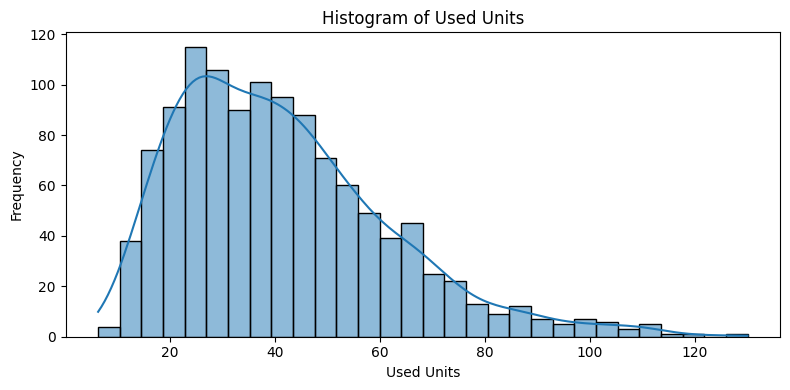

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for used_units
plt.figure(figsize=(8, 4))
sns.histplot(df['used_units'], kde=True, bins=30)
plt.title('Histogram of Used Units')
plt.xlabel('Used Units')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


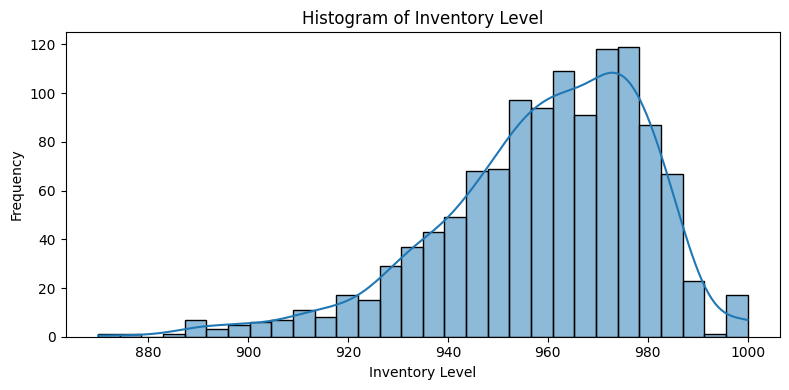

In [15]:
# Histogram for inventory_level
plt.figure(figsize=(8, 4))
sns.histplot(df['inventory_level'], kde=True, bins=30)
plt.title('Histogram of Inventory Level')
plt.xlabel('Inventory Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


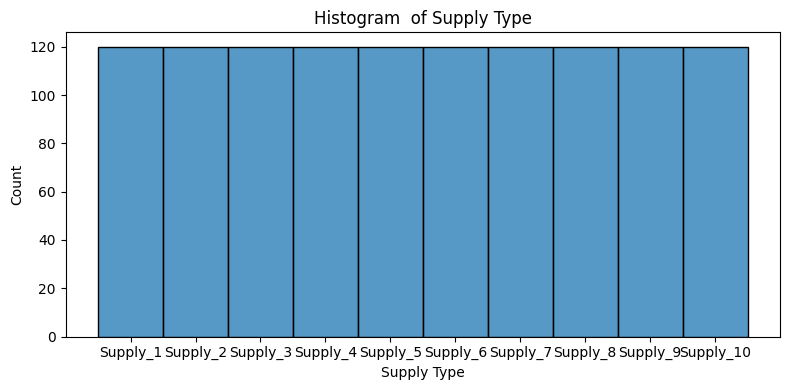

In [20]:
# Countplot for supply_type (categorical)
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='supply_type')
plt.title('Histogram  of Supply Type')
plt.xlabel('Supply Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

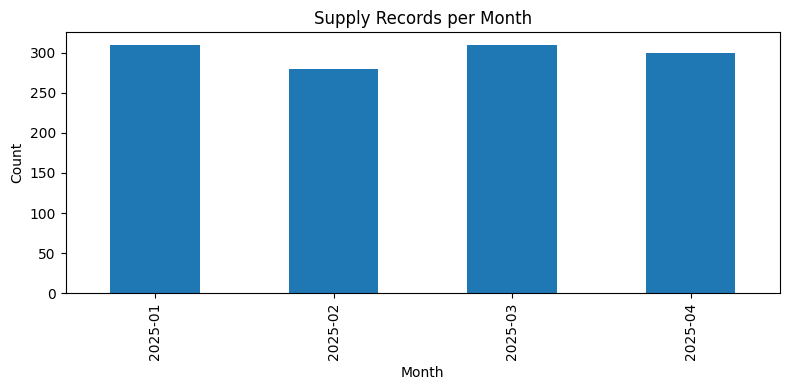

In [21]:
# Histogram-like line plot of records over time
plt.figure(figsize=(8, 4))
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Supply Records per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# ➡️Boxplot – To Detect Outliers

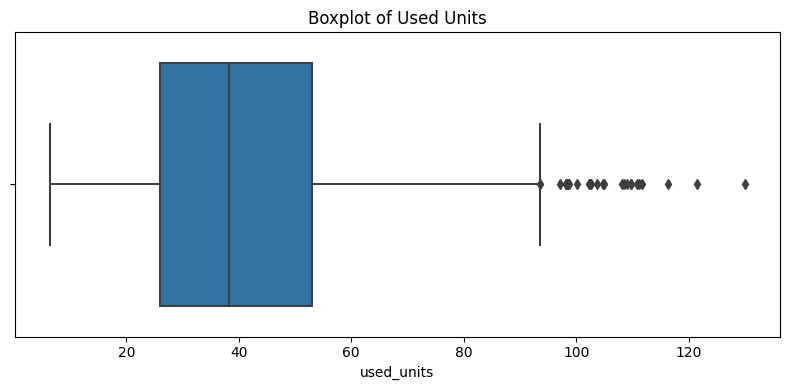

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for used_units
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['used_units'])
plt.title('Boxplot of Used Units')
plt.tight_layout()
plt.show()

#  IQR for used_units


In [30]:
Q1_used = df['used_units'].quantile(0.25)
Q3_used = df['used_units'].quantile(0.75)
IQR_used = Q3_used - Q1_used
print("IQR for used_units=",IQR_used)

IQR for used_units= 27.000866256186235


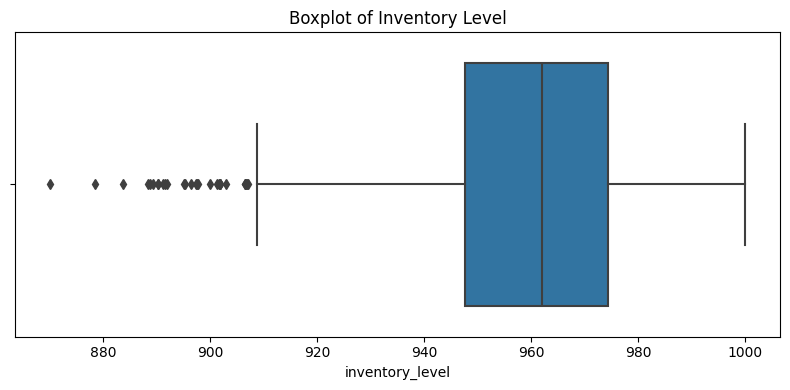

In [23]:
# Boxplot for inventory_level
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['inventory_level'])
plt.title('Boxplot of Inventory Level')
plt.tight_layout()
plt.show()

# IQR for inventory_level


In [31]:
Q1_inv = df['inventory_level'].quantile(0.25)
Q3_inv = df['inventory_level'].quantile(0.75)
IQR_inv = Q3_inv - Q1_inv
print("IQR for Inventory Level:", IQR_inv)

IQR for Inventory Level: 26.88488212972254


# ➡️Q-Q Plot


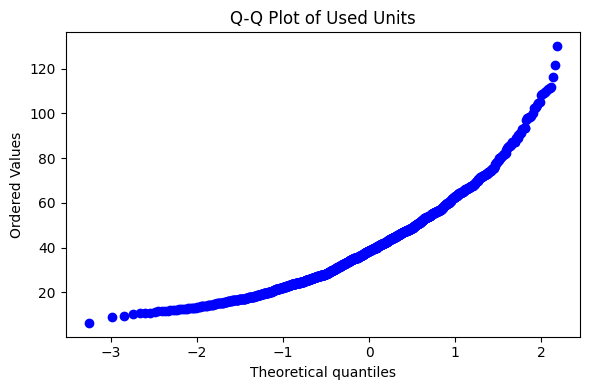

In [32]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot for used_units
plt.figure(figsize=(6, 4))
stats.probplot(df['used_units'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Used Units')
plt.tight_layout()
plt.show()

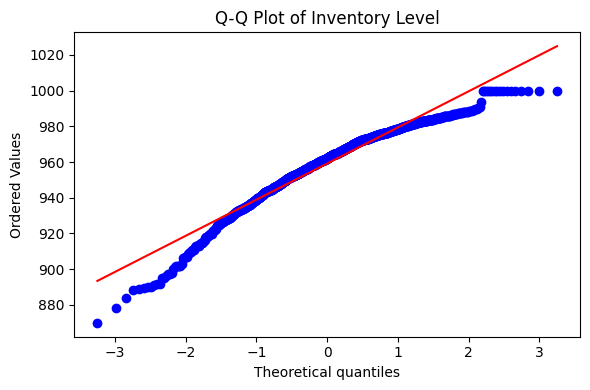

In [33]:
# Q-Q Plot for inventory_level
plt.figure(figsize=(6, 4))
stats.probplot(df['inventory_level'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Inventory Level')
plt.tight_layout()
plt.show()

# ➡️ Data Preprocessing


# Step 1: Import Required Libraries

In [34]:
import pandas as pd
import numpy as np

# Step 2: Load the CSV File

In [35]:
df = pd.read_csv('supply.csv')
df

,date,supply_type,used_units,inventory_level
0,2025-01-01,Supply_1,35.269563,964.730437
1,2025-01-01,Supply_2,25.677061,974.322939
2,2025-01-01,Supply_3,55.136125,944.863875
3,2025-01-01,Supply_4,35.454317,964.545683
4,2025-01-01,Supply_5,43.397502,956.602498
...,...,...,...,...
1195,2025-04-30,Supply_6,23.742305,976.257695
1196,2025-04-30,Supply_7,64.955673,935.044327
1197,2025-04-30,Supply_8,21.987680,978.012320
1198,2025-04-30,Supply_9,36.417033,963.582967


# Step 2:Understanding the data


In [37]:
 df.head()  # top 5 rows

,date,supply_type,used_units,inventory_level
0,2025-01-01,Supply_1,35.269563,964.730437
1,2025-01-01,Supply_2,25.677061,974.322939
2,2025-01-01,Supply_3,55.136125,944.863875
3,2025-01-01,Supply_4,35.454317,964.545683
4,2025-01-01,Supply_5,43.397502,956.602498


In [38]:
df.info()  #Basic Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1200 non-null   object 
 1   supply_type      1200 non-null   object 
 2   used_units       1183 non-null   float64
 3   inventory_level  1200 non-null   float64
dtypes: float64(2), object(2)
memory usage: 37.6+ KB


In [40]:
df.shape # no.of rows and columns

(1200, 4)

In [45]:
df.describe() # summary statistics

,used_units,inventory_level
count,1183.000000,1200.000000
mean,41.442281,959.144818
std,20.227105,20.672226
min,6.366389,869.933118
25%,26.008381,947.547432
50%,38.217135,962.030304
75%,53.009248,974.432314
max,130.066882,1000.000000


In [48]:
df.columns.tolist()

['date', 'supply_type', 'used_units', 'inventory_level']

# Step 3: Check for Missing Values


In [49]:
print(df.isnull().sum())  # Total missing values per column

date                0
supply_type         0
used_units         17
inventory_level     0
dtype: int64


In [55]:
# Check for duplicates
print(df['inventory_level'].duplicated().sum())

# Fill or drop if missing
df = df.dropna(subset=['inventory_level'])


0


In [57]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1183 non-null   object 
 1   supply_type      1183 non-null   object 
 2   used_units       1183 non-null   float64
 3   inventory_level  1183 non-null   float64
dtypes: float64(2), object(2)
memory usage: 46.2+ KB


date               0
supply_type        0
used_units         0
inventory_level    0
dtype: int64

# Repeat EDA (Post-Cleaning)


# # a) Summary statistics

In [64]:
print(df.describe(include = 'all'))

              date supply_type   used_units  inventory_level
count         1183        1183  1183.000000      1183.000000
unique         120          10          NaN              NaN
top     2025-01-01    Supply_2          NaN              NaN
freq            10         120          NaN              NaN
mean           NaN         NaN    41.442281       958.557719
std            NaN         NaN    20.227105        20.227105
min            NaN         NaN     6.366389       869.933118
25%            NaN         NaN    26.008381       946.990752
50%            NaN         NaN    38.217135       961.782865
75%            NaN         NaN    53.009248       973.991619
max            NaN         NaN   130.066882       993.633611


# b) Categorical distributions


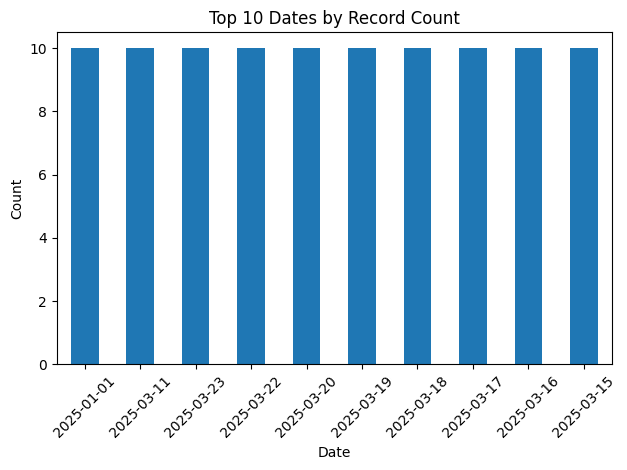

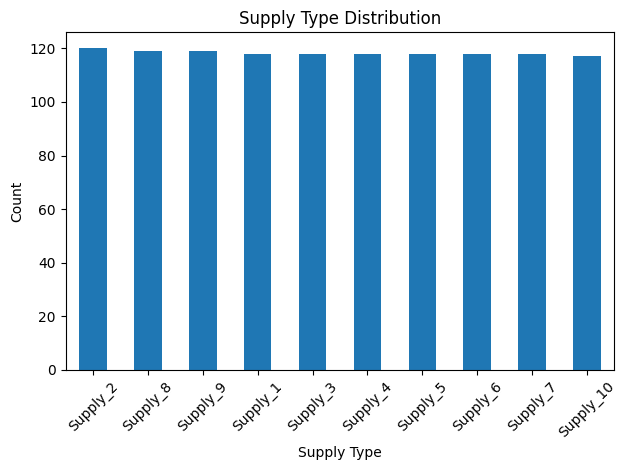

In [65]:
import matplotlib.pyplot as plt

# Bar plot for Date Distribution (Top 10 only to avoid overcrowding)
df['date'].value_counts().head(10).plot(kind='bar', title='Top 10 Dates by Record Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for Supply Type Distribution
df['supply_type'].value_counts().plot(kind='bar', title='Supply Type Distribution')
plt.xlabel('Supply Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# c) Boxplots after cleaning


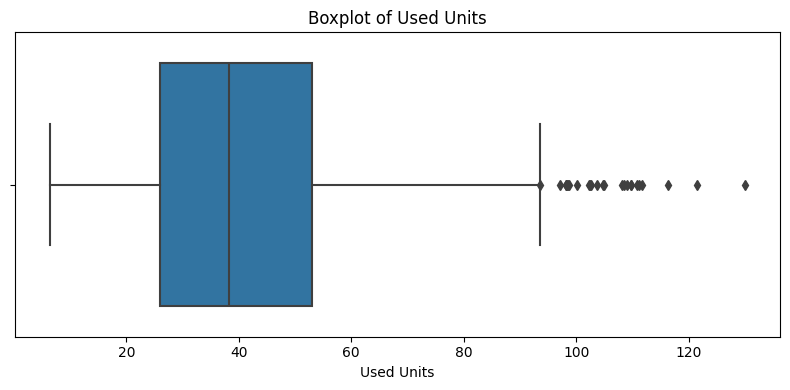

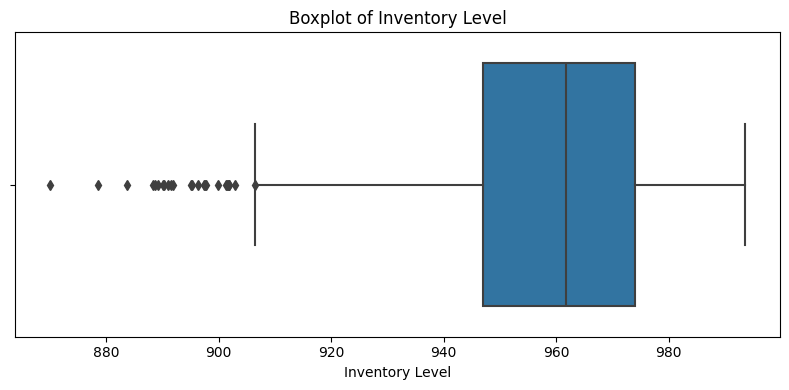

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for used_units
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['used_units'])
plt.title('Boxplot of Used Units')
plt.xlabel('Used Units')
plt.tight_layout()
plt.show()

# Boxplot for inventory_level
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['inventory_level'])
plt.title('Boxplot of Inventory Level')
plt.xlabel('Inventory Level')
plt.tight_layout()
plt.show()


#  Check Skewness Values


In [69]:
numeric_cols = ['used_units' ,'inventory_level']
numeric_cols

['used_units', 'inventory_level']

In [70]:
print("Skewness of numeric columns:")
print(df[numeric_cols].skew())


Skewness of numeric columns:
used_units         1.003034
inventory_level   -1.003034
dtype: float64


In [ ]:
# Visualizing Skew Values

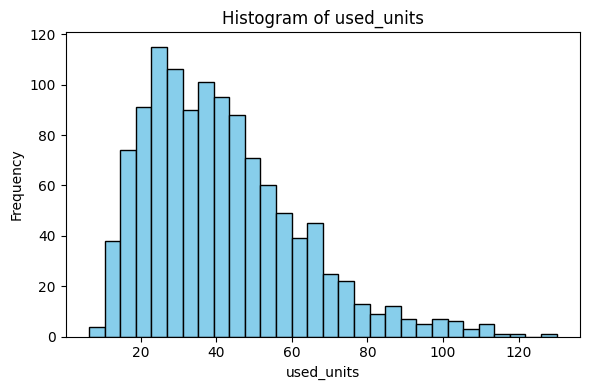

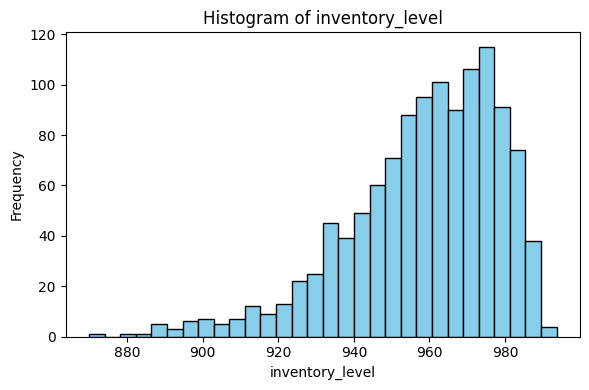

In [71]:
import matplotlib.pyplot as plt

# List of numeric columns
numeric_cols = ['used_units', 'inventory_level']

# Plot basic histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


Right skew in used_units (long tail to the right)

Left skew in inventory_level (long tail to the left)

# Perform Univariate, Bivariate, and Multivariate analysis to extract meaningful insights and identify relationships among variables.

In [73]:
df = pd.read_csv('supply.csv')
df

,date,supply_type,used_units,inventory_level
0,2025-01-01,Supply_1,35.269563,964.730437
1,2025-01-01,Supply_2,25.677061,974.322939
2,2025-01-01,Supply_3,55.136125,944.863875
3,2025-01-01,Supply_4,35.454317,964.545683
4,2025-01-01,Supply_5,43.397502,956.602498
...,...,...,...,...
1195,2025-04-30,Supply_6,23.742305,976.257695
1196,2025-04-30,Supply_7,64.955673,935.044327
1197,2025-04-30,Supply_8,21.987680,978.012320
1198,2025-04-30,Supply_9,36.417033,963.582967


# 🔹 1. Univariate Analysis (one variable at a time)


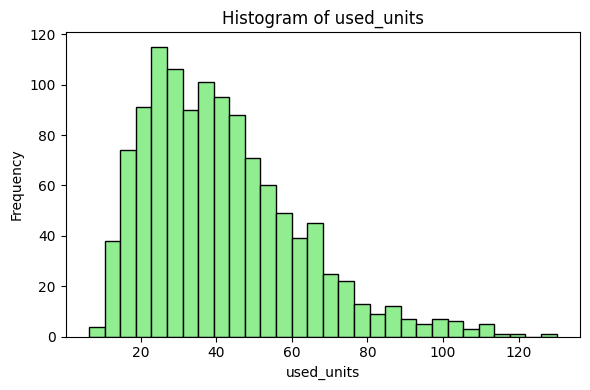

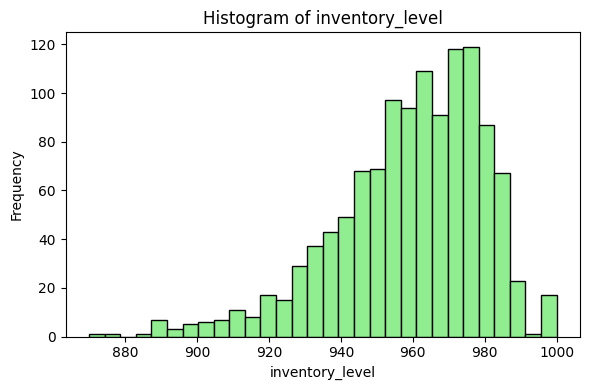

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric columns
for col in ['used_units', 'inventory_level']:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


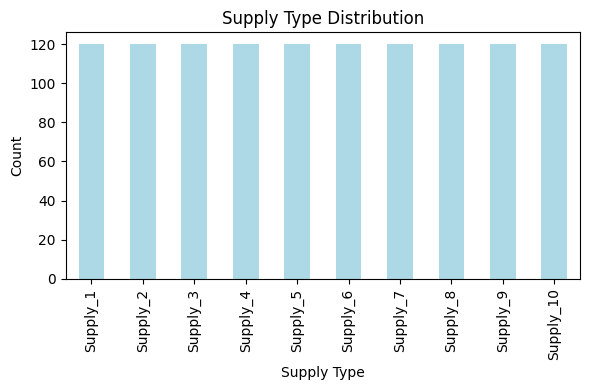

In [75]:
# Bar plot for categorical column
plt.figure(figsize=(6, 4))
df['supply_type'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Supply Type Distribution')
plt.xlabel('Supply Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# 🔹 2. Bivariate Analysis (relationship between two variables)


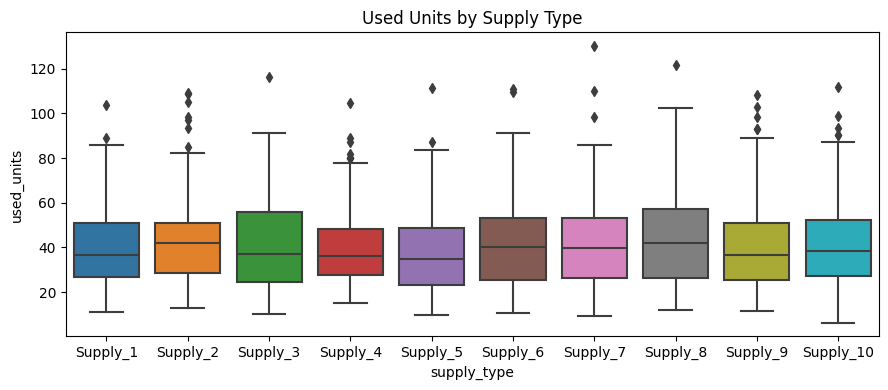

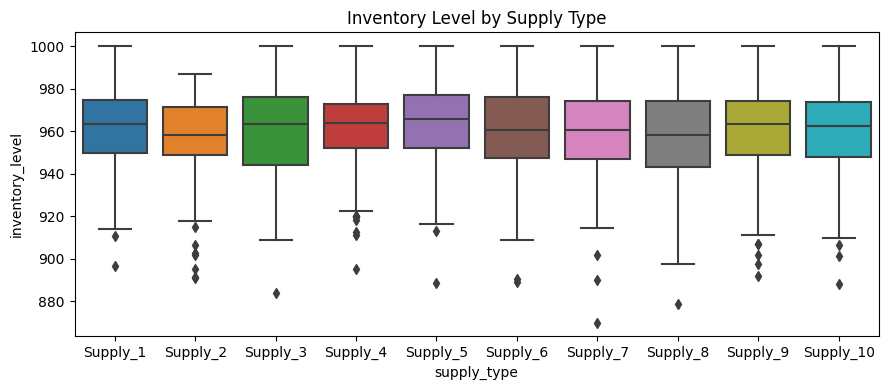

In [79]:
# Boxplot: Supply Type vs Used Units
plt.figure(figsize=(9, 4))
sns.boxplot(x='supply_type', y='used_units', data=df)
plt.title('Used Units by Supply Type')
plt.tight_layout()
plt.show()

# Boxplot: Supply Type vs Inventory Level
plt.figure(figsize=(9, 4))
sns.boxplot(x='supply_type', y='inventory_level', data=df)
plt.title('Inventory Level by Supply Type')
plt.tight_layout()
plt.show()


# 🔹 3. Multivariate Analysis (3+ variables)
Generally used heatmaps or scaterplots

Look for patterns or interactions among 3 or more variables.





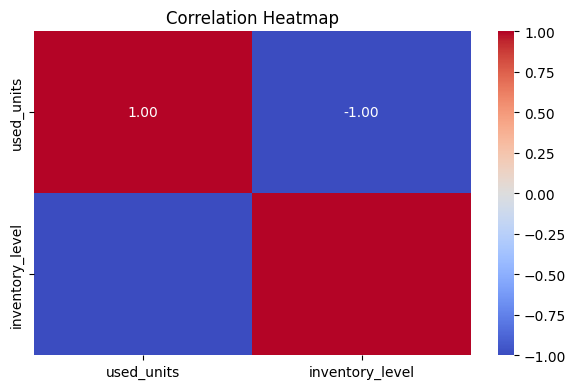

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['used_units', 'inventory_level']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# ✅ **Summary of Insights We Can Extract:**


| **Type**     | **Insights**                                                                  |
| ------------ | ----------------------------------------------------------------------------- |
| Univariate   | `Used_units` is right-skewed, indicating most supplies are used in low units. |
| Univariate   | `Inventory_level` is left-skewed, suggesting higher inventory is rare.        |
| Univariate   | Some `supply_type` categories dominate the dataset.                           |
| Bivariate    | Certain `supply_type` values have higher average `used_units`.                |
| Bivariate    | `Inventory_level` varies significantly across `supply_type`.                  |
| Multivariate | `Used_units` and `inventory_level` show weak or inverse correlation.          |
| Multivariate | Supply types with high usage tend to have lower inventory levels.             |
